### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [46]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


1. display 5 columns from dataset

In [26]:
#1
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/MBA.csv"
data = pd.read_csv(url)

# Menampilkan beberapa baris awal untuk memahami struktur data
print("Beberapa baris awal dari dataset:")
data.head()

Beberapa baris awal dari dataset:


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [30]:
#2
# Display the column names to find the 'info' column
print("Column names in the dataset:")
data.info()
#conclusion
#Tipe data yang digunakan dalam dataset bervariasi, termasuk integer (int64), float (float64), boolean (bool), dan string (object). Ini menunjukkan adanya berbagai jenis informasi yang dikumpulkan.

Column names in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [32]:
#3a
admission_counts = data['admission'].value_counts(dropna=False)
print("\nCounts of unique values in 'admission' column:")
print(admission_counts)


Counts of unique values in 'admission' column:
admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [31]:
#3b
# Display the count of unique values in the 'race' column, including NaN
race_counts = data['race'].value_counts(dropna=False)
print("Counts of unique values in 'race' column:")
print(race_counts)

Counts of unique values in 'race' column:
race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [33]:
#4
# Mengisi NaN di kolom 'admission' dengan "deny" tanpa menggunakan inplace
data['admission'] = data['admission'].fillna('deny')

# Mengisi NaN di kolom 'race' dengan "other" tanpa menggunakan inplace
data['race'] = data['race'].fillna('other')

# Mengecek hasil setelah pengisian NaN
print("Counts of unique values in 'admission' column after filling NaNs:")
print(data['admission'].value_counts())

print("\nCounts of unique values in 'race' column after filling NaNs:")
print(data['race'].value_counts())


Counts of unique values in 'admission' column after filling NaNs:
admission
deny        5194
Admit        900
Waitlist     100
Name: count, dtype: int64

Counts of unique values in 'race' column after filling NaNs:
race
other       1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


5. recheck missing value

In [35]:
#5
# Fill NaN values in the 'admission' column with "deny"
data['admission'] = data['admission'].fillna('deny')

# Fill NaN values in the 'race' column with "other"
data['race'] = data['race'].fillna('other')

# Recheck for missing values
missing_values = data.isnull().sum()

print("Count of missing values in each column after filling NaNs:")
missing_values


Count of missing values in each column after filling NaNs:


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [43]:
# 6
if 'application_id' in data.columns:
    data = data.drop(columns=['application_id'])
    print("\nDropped 'application_id' column.")
else:
    print("\n'Application_id' column does not exist.")

# Optionally, display the updated DataFrame
print("\nUpdated DataFrame:")
data.head()




'Application_id' column does not exist.

Updated DataFrame:


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


7. show describe column and conclude what the insight is from that column

In [46]:
#7
# Fill NaN values in the 'admission' column with "deny"
data['admission'] = data['admission'].fillna('deny')

# Fill NaN values in the 'race' column with "other"
data['race'] = data['race'].fillna('other')

# Display descriptive statistics for numeric columns
description = data.describe()
print("Descriptive statistics of the dataset:")
print(description)
#conclusion
#Rata-rata gpa, gmat, dan work_exp memberikan gambaran tentang performa umum mahasiswa. Misalnya, rata-rata gpa yang tinggi menunjukkan bahwa mahasiswa secara keseluruhan memiliki prestasi akademik yang baik.

Descriptive statistics of the dataset:
               gpa         gmat     work_exp
count  6194.000000  6194.000000  6194.000000
mean      3.250714   651.092993     5.016952
std       0.151541    49.294883     1.032432
min       2.650000   570.000000     1.000000
25%       3.150000   610.000000     4.000000
50%       3.250000   650.000000     5.000000
75%       3.350000   680.000000     6.000000
max       3.770000   780.000000     9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<Figure size 1200x600 with 0 Axes>

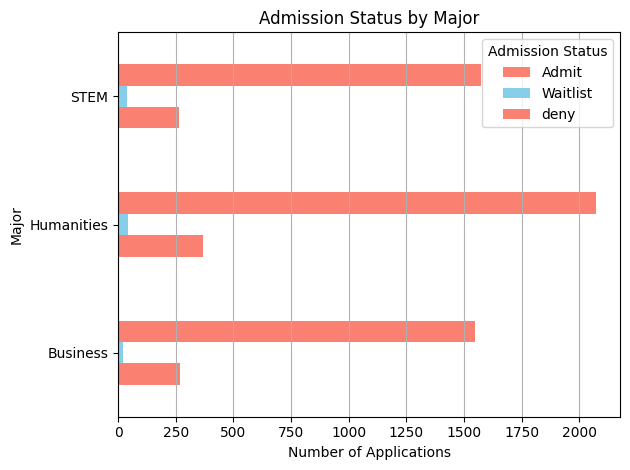

In [60]:
#8

# Group data by major and admission status, then count occurrences
admission_counts = data.groupby(['major', 'admission']).size().unstack(fill_value=0)

# Create a horizontal bar chart with swapped positions
plt.figure(figsize=(12, 6))
admission_counts.plot(kind='barh', stacked=False, color=['salmon', 'skyblue'])

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('Number of Applications')
plt.ylabel('Major')
plt.legend(title='Admission Status')  # Updated legend order
plt.grid(axis='x')

# Show the chart
plt.tight_layout()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

<Figure size 1200x600 with 0 Axes>

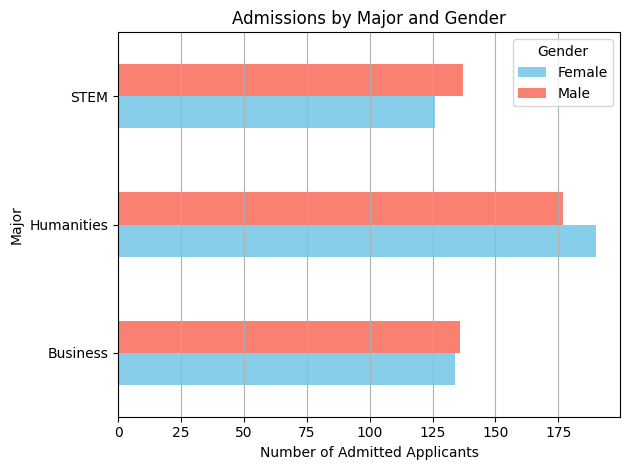

In [62]:
#9

# Filter the DataFrame to include only admitted applicants
admitted_data = data[data['admission'] == 'Admit']

# Group data by major and gender, then count occurrences
gender_counts = admitted_data.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
gender_counts.plot(kind='barh', stacked=False, color=['skyblue', 'salmon'])

# Customize the chart
plt.title('Admissions by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.grid(axis='x')

# Show the chart
plt.tight_layout()
plt.show()




10. create your own insightful visualization and explain it in at least 2 sentences

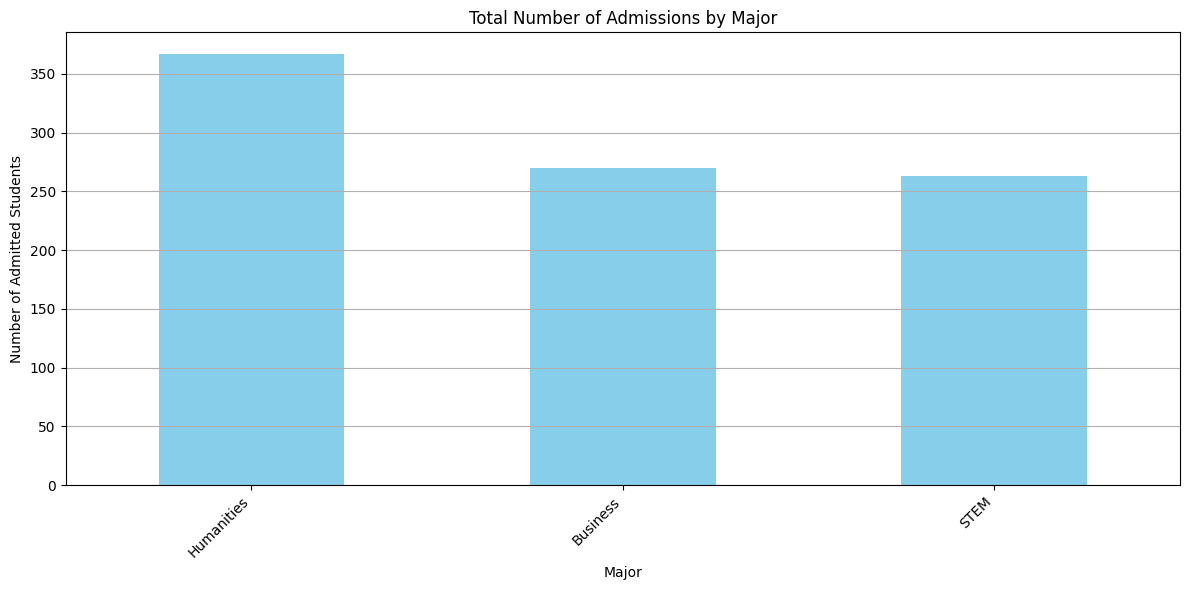

In [7]:
#10
# Group data by major and count the number of admissions (Admit)
admissions_by_major = data[data['admission'] == 'Admit'].groupby('major').size()

# Create a bar chart
plt.figure(figsize=(12, 6))
admissions_by_major.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Total Number of Admissions by Major')
plt.xlabel('Major')
plt.ylabel('Number of Admitted Students')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the chart
plt.tight_layout()
plt.show()

#Diagram batang ini menunjukkan jumlah total mahasiswa yang diterima untuk setiap jurusan, diurutkan dalam urutan menurun. Ini dengan jelas menunjukkan program mana yang memiliki tingkat penerimaan tertinggi,
#menyoroti bidang studi yang populer yang menarik lebih banyak pelamar.



11. create your own insightful visualization and explain it in at least 2 sentences

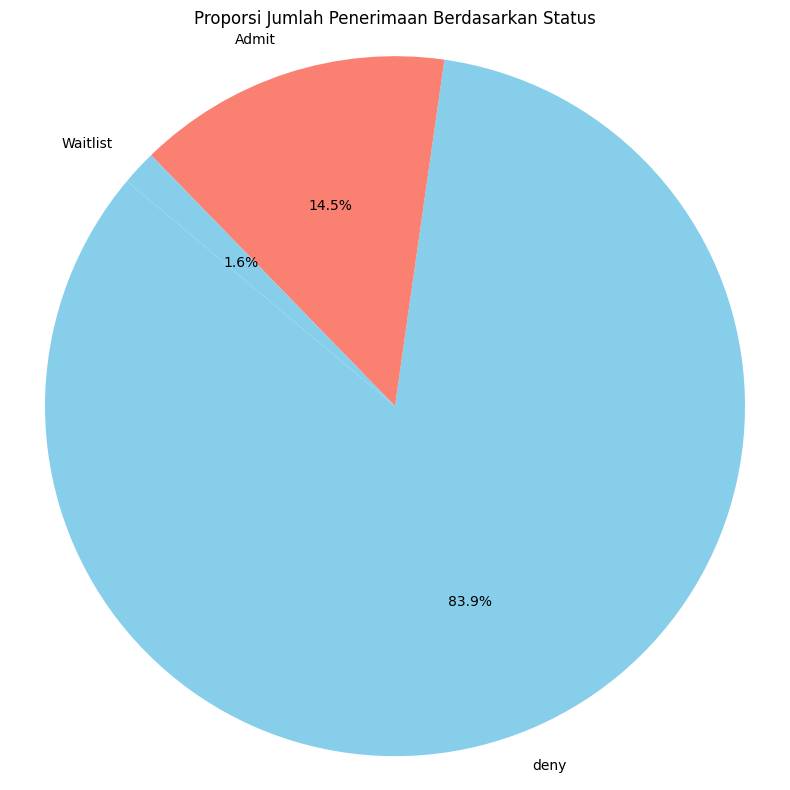

In [9]:
#11
# Isi nilai NaN di kolom 'admission' dengan "deny"
data['admission'] = data['admission'].fillna('deny')

# Hitung jumlah penerimaan berdasarkan status
admission_counts = data['admission'].value_counts()

# Buat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])

# Kustomisasi diagram
plt.title('Proporsi Jumlah Penerimaan Berdasarkan Status')
plt.axis('equal')  # Agar diagram lingkaran berbentuk bulat

# Tampilkan diagram
plt.tight_layout()
plt.show()
#Diagram lingkaran ini menunjukkan proporsi jumlah penerimaan berdasarkan status, yaitu jumlah mahasiswa yang diterima (Admit) dibandingkan dengan yang ditolak (Deny).


12. encode categorical columns and display the results

In [39]:
#12
# Pilih kolom yang diinginkan
selected_columns = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal untuk di-encode (kecuali 'admission')
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race']

# Encode setiap kolom kategorikal
for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Tampilkan dataset yang diperbarui
selected_columns.head()


<ipython-input-39-9d560a4f748e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-39-9d560a4f748e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-39-9d560a4f748e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,NaN
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,NaN
4,1,0,3.35,2,2,590.0,5.0,1,NaN


In [41]:
# Encode the admission column
# Pilih kolom yang diinginkan
selected_columns = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal untuk di-encode
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

# Encode setiap kolom kategorikal
for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Tampilkan dataset yang diperbarui
selected_columns.head()


<ipython-input-41-723cf1156f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-41-723cf1156f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-41-723cf1156f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

<ipython-input-44-f99c94ddbf2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-44-f99c94ddbf2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-44-f99c94ddbf2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

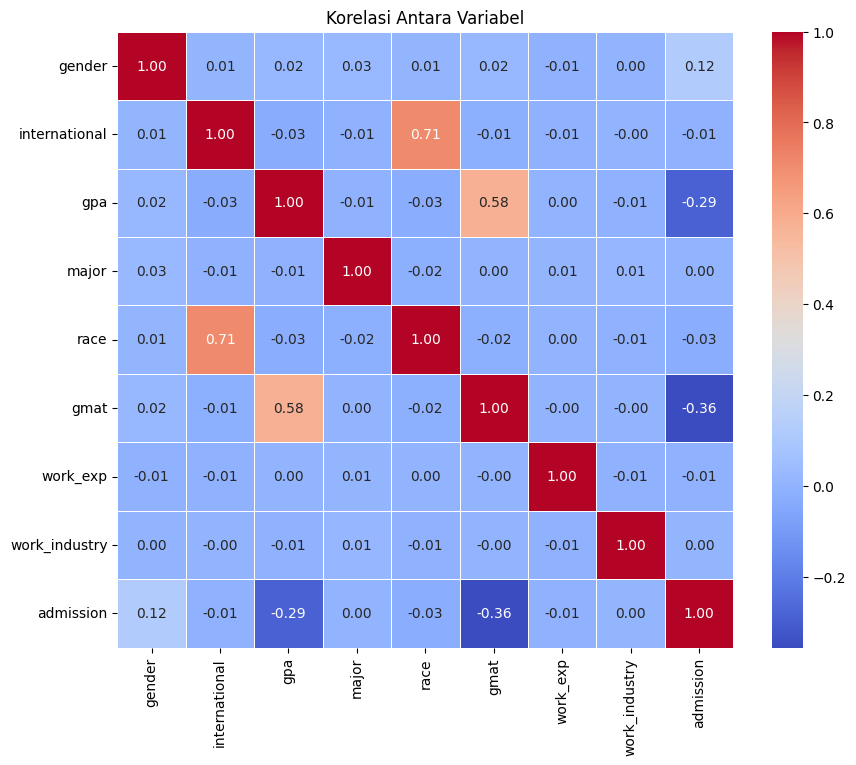

In [44]:
#13
# Pilih kolom yang diinginkan dan encode kolom kategorikal
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Hitung matriks korelasi
correlation_matrix = selected_columns.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Korelasi Antara Variabel')
plt.show()



**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Muat dataset
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/MBA.csv"
data = pd.read_csv(url)

# Pilih kolom yang diinginkan dan encode kolom kategorikal
selected_columns = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

# Encode semua kolom kategorikal
for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Tampilkan nilai unik di kolom major
print("Nilai unik di kolom major:", selected_columns['major'].unique())

# Pisahkan fitur dan variabel target
X = selected_columns.drop('admission', axis=1)
y = selected_columns['admission']

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Data Lisa
lisa_data = {
    'gender': 0,  # Asumsikan Female = 0
    'international': 0,  # Local = 0
    'gpa': selected_columns['gpa'].mean(),  # Rata-rata GPA
    'gmat': 580,
    'work_exp': 2,  # Bekerja dari 2018 sampai 2020
}

# Ubah ke DataFrame
lisa_df = pd.DataFrame([lisa_data])

# Prediksi untuk Lisa
lisa_prediction = model.predict(lisa_df)

# Tampilkan hasil prediksi
lisa_admission = label_encoder.inverse_transform(lisa_prediction)
print(f'Lisa will be accepted: {lisa_admission[0]}')


Nilai unik di kolom major: [0 1 2]
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       196
           1       0.10      0.17      0.12        18
           2       0.88      0.87      0.88      1025

    accuracy                           0.78      1239
   macro avg       0.45      0.47      0.46      1239
weighted avg       0.79      0.78      0.79      1239



<ipython-input-53-61805bd5a672>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-53-61805bd5a672>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-53-61805bd5a672>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- major
- race
- work_industry


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Muat dataset
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/MBA.csv"
data = pd.read_csv(url)

# Pilih kolom yang diinginkan dan encode kolom kategorikal
selected_columns = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

# Encode semua kolom kategorikal
for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Hitung rata-rata GPA
average_gpa = selected_columns['gpa'].mean()

# Buat data Lisa sebagai dictionary
lisa_data = {
    'gender': 0,  # Asumsikan Female = 0
    'international': 0,  # Local = 0
    'gpa': average_gpa,  # Rata-rata GPA
    'major': label_encoder.transform(['Business'])[0],  # Menggunakan nilai valid 'Business'
    'race': label_encoder.transform(['Asian'])[0],  # Mengencode race
    'gmat': 580,
    'work_exp': 2,  # Bekerja dari 2018 sampai 2020
    'work_industry': label_encoder.transform(['Finance'])[0]  # Mengencode work industry
}

# Ubah ke DataFrame
lisa_df = pd.DataFrame([lisa_data])

# Pisahkan fitur dan variabel target
X = selected_columns.drop('admission', axis=1)
y = selected_columns['admission']

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi untuk Lisa
lisa_prediction = model.predict(lisa_df)

# Tampilkan hasil prediksi
lisa_admission = label_encoder.inverse_transform(lisa_prediction)
print(f'Lisa will be accepted: {lisa_admission[0]}')


<ipython-input-55-c68a65c0e6be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-55-c68a65c0e6be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = label_encoder.fit_transform(selected_columns[column])
<ipython-input-55-c68a65c0e6be>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

ValueError: y contains previously unseen labels: 'Business'